In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar o modelo salvo
modelo_carregado = load_model('rede_treinada_1p_200px.keras')

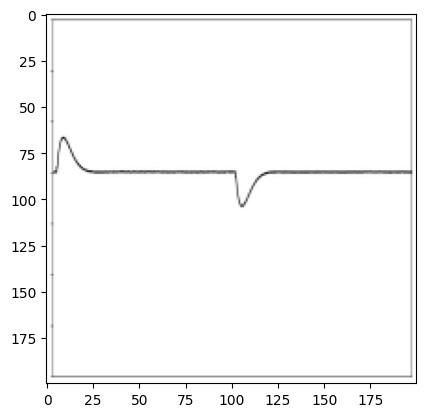

In [3]:
tam=200
imagens_array = []
imagem = cv2.imread("aquisicao04.jpg",cv2.IMREAD_GRAYSCALE)   #Carregando a imagem
imagem = cv2.resize(imagem, (tam, tam),interpolation = cv2.INTER_AREA) #Redimensionamento da imagem
matriz_imagem = np.array(imagem)
imagens_array.append(matriz_imagem)

imagens_array=np.array(imagens_array)

imagens_array=imagens_array/255

plt.figure()

plt.imshow(imagens_array[0,:,:],cmap='gray')
plt.grid(False)
plt.show()

In [7]:
maximos=np.load("maximos.npy")
mse = MeanSquaredError()
x = (301.6,3.35e-04,7.94e-09)
x = x/maximos
teste=modelo_carregado.predict(imagens_array)
print(teste*maximos)
loss = mse(x, teste).numpy()

print(f"Loss (MSE): {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[3.01462404e+02 5.35630064e-04 9.91855713e-09]]
Loss (MSE): 0.0035647430922836065


Valores reais (R= 301.6, L= 3.35e-04, C= 7.94e-09)